In [1]:
from useful_scit.imps import *

In [103]:
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

plt.style.use('ggplot')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

In [3]:
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-08-18_18-46-19_'
# flp = FLP.FlexLogPol(path,concat=True)
# self = FLP.FlexLogPol(path,concat=False)

self = FLP.FlexLogPol(
    path,
#     concat=True,
    concat=False,
    get_clusters=False,
    open_merged=True,
    clusters_avail=False
)

'using vol for conc'


In [10]:
ds = self.merged_ds

In [11]:
ds

<xarray.Dataset>
Dimensions:        (R_CENTER: 36, TH_CENTER: 36, ZMID: 22, releases: 3864)
Coordinates:
  * R_CENTER       (R_CENTER) float64 0.05613 0.06721 0.08046 ... 25.53 30.57
  * releases       (releases) datetime64[ns] 2017-12-06 ... 2018-05-16T23:00:00
  * TH_CENTER      (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 6.021 6.196
    ZTOP           (ZMID) float64 50.0 100.0 200.0 300.0 ... 1e+04 2e+04 3e+04
    LAT            (R_CENTER, TH_CENTER) float64 ...
    LON            (R_CENTER, TH_CENTER) float64 ...
    LAT_00         (R_CENTER, TH_CENTER) float64 ...
    LON_00         (R_CENTER, TH_CENTER) float64 ...
    LAT_10         (R_CENTER, TH_CENTER) float64 ...
    LON_10         (R_CENTER, TH_CENTER) float64 ...
    LAT_11         (R_CENTER, TH_CENTER) float64 ...
    LON_11         (R_CENTER, TH_CENTER) float64 ...
    LAT_01         (R_CENTER, TH_CENTER) float64 ...
    LON_01         (R_CENTER, TH_CENTER) float64 ...
    GRIDAREA       (R_CENTER, TH_CENTER) float64 ..

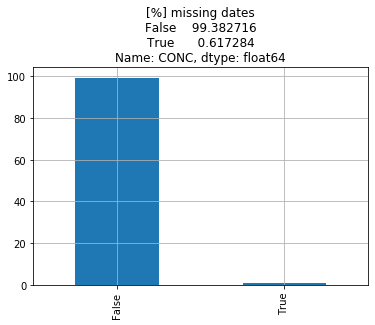

In [89]:
_c = fa.get_dims_complement(ds,[co.RL])
ds_sum = ds.sum(_c)

_ds = ds_sum[co.CONC]

_ds = _ds.resample(**{co.RL:'1H'}).mean()

_n = _ds.isnull().to_dataframe()[co.CONC]

_vc = _n.value_counts()/_n.count() * 100

import pprint
_p = pprint.pformat(_vc,compact=True)

ax = _vc.plot.bar()
ax.set_title('[%] missing dates\n' + _p)
ax.grid(True)
# ax.figure

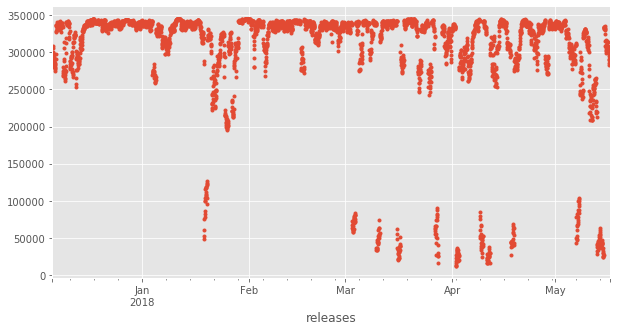

In [149]:
_pd = _ds.to_pandas()
ax = _pd.plot(
#     kind='',
    figsize=(10,5),
    linewidth=0,
    marker='.'
)

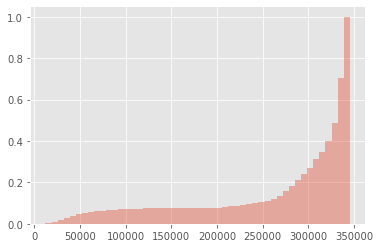

In [151]:
ax = sns.distplot(_pd.dropna(),hist_kws=dict(cumulative=True),kde=False,norm_hist=True)

In [152]:
pd1 = _pd[_pd<5e4]

In [153]:
ind = pd1.index

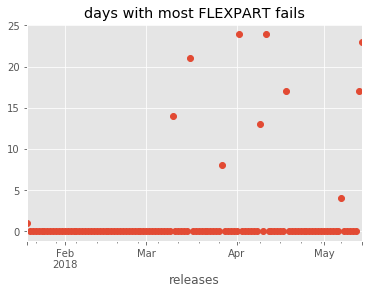

In [154]:
pd2 = pd1.resample('D').count()
ax = pd2.plot(marker='o',linewidth=0)
txt = ax.set_title('days with most FLEXPART fails')

In [155]:
pd3 = pd2[pd2>0]

In [156]:
pd3.sort_values(ascending=False)

releases
2018-04-11    24
2018-04-02    24
2018-05-14    23
2018-03-16    21
2018-05-13    17
2018-04-18    17
2018-03-10    14
2018-04-09    13
2018-03-27     8
2018-05-07     4
2018-01-19     1
dtype: int64

In [166]:
l = np.linspace(0,10,11)

In [167]:
l

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [171]:
l[None:None:None]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [174]:
sns.choose_colorbrewer_palette('q')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [179]:
sns.color_palette("Set2",3,as_cmap=True)

TypeError: color_palette() got an unexpected keyword argument 'as_cmap'

In [183]:
cmap = plt.cm.get_cmap('Set1',3)

In [184]:
%connect_info

{
  "shell_port": 51734,
  "iopub_port": 51735,
  "stdin_port": 51736,
  "control_port": 51737,
  "hb_port": 51738,
  "ip": "127.0.0.1",
  "key": "7732bc67-f69f2acd7b99565ab8890f3c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-f7547e49-00c0-4733-a608-44de909b0974.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [185]:
from IPython import get_ipython
ipython = get_ipython()

In [188]:
ipython.magic('load_ext autoreload')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
